In [1]:
import matplotlib
import numpy as np
import scipy
from scipy import special, integrate
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
dir_pk = '/scratch/ksf293/inputs'

L = 750
n_str = '2e-4'


cat_tag = '_z057_patchy'
fn_pk = f'{dir_pk}/cat_L{L}_n{n_str}{cat_tag}_pk.txt'
fn_pkG = f'{dir_pk}/cat_L{L}_n{n_str}{cat_tag}_pkG.dat'

In [4]:
n = float(n_str)
print(n)
V = L**3
b = 2 #bias

0.0002


In [5]:
k, pk = np.loadtxt(fn_pk, unpack=True)
print(k.shape, pk.shape)
kG, pkG = np.loadtxt(fn_pkG, unpack=True)

(1037,) (1037,)


In [6]:
b2pk = b**2 * pk


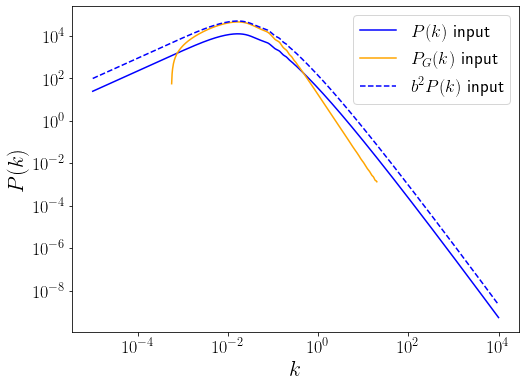

In [7]:
plt.figure(figsize=(8,6))
plt.plot(k, pk, color='blue', label=r'$P(k)$ input')
plt.plot(kG, pkG, color='orange', label=r'$P_G(k)$ input')
plt.plot(k, b2pk, color='blue', ls='--', label=r'$b^2P(k)$ input')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')

plt.legend()

In [8]:
rs = np.linspace(40, 150, 20)
xi_stds = np.empty(rs.shape)

In [9]:
k_min, k_max = 1e-2, 1e1
imin = np.abs(k - k_min).argmin()
imax = np.abs(k - k_max).argmin()
print(k[imin], k[imax])

0.0099227472 10.044995


In [10]:
for i, r in enumerate(rs):
    integrand_sampled = k[imin:imax]/r * (b2pk[imin:imax]+1/n)**2 * (scipy.special.jv(1/2, k[imin:imax]*r))**2
    integral = scipy.integrate.simpson(integrand_sampled, x=k[imin:imax])
    
    C = (2*np.pi)**(-1)/V * integral
    xi_stds[i] = np.sqrt(C)

Text(0, 0.5, '$\\sigma(\\xi)$')

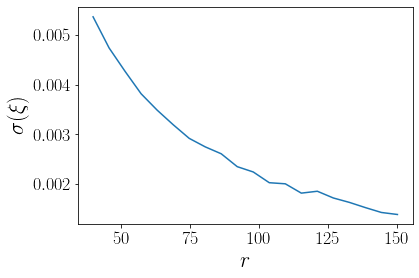

In [11]:
plt.plot(rs, xi_stds)
plt.xlabel('$r$')
plt.ylabel(r'$\sigma(\xi)$')

## try continuous with nbodykit

In [12]:
from nbodykit.lab import cosmology

In [13]:
c = cosmology.Planck15
Plin = cosmology.LinearPower(c, redshift=0., transfer='CLASS')
k_cont = np.logspace(-4, 4, 1000)

In [86]:
def P_interp(k_interp):
    return np.interp(k_interp, k, pk)

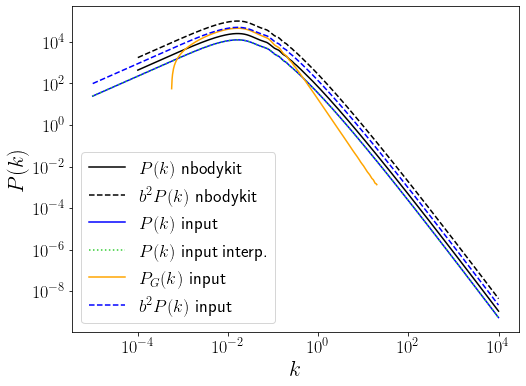

In [88]:
plt.figure(figsize=(8,6))
plt.loglog(k_cont, Plin(k_cont), c='k', label=r'$P(k)$ nbodykit')
plt.loglog(k_cont, b**2 * Plin(k_cont), c='k', ls='--', label=r'$b^2 P(k)$ nbodykit')

plt.plot(k, pk, color='blue', label=r'$P(k)$ input')
plt.plot(k, P_interp(k), color='limegreen', label=r'$P(k)$ input interp.', ls=':')

plt.plot(kG, pkG, color='orange', label=r'$P_G(k)$ input')
plt.plot(k, b2pk, color='blue', ls='--', label=r'$b^2P(k)$ input')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')

plt.legend()

In [46]:
k_min, k_max = 2*np.pi/L, 20
xi_stds_cont = np.empty(rs.shape)

for i, r in enumerate(rs):
    
    def integrand_func(k):
        return k/r * (b**2 * Plin(k) + 1/(n))**2 * (scipy.special.jv(1/2, k*r))**2
    
    integral, _ = scipy.integrate.quad(integrand_func, k_min, k_max, limit=500)
    
    C = (2*np.pi)**(-1)/V * integral
    xi_stds_cont[i] = np.sqrt(C)

/state/partition1/job-29645869/ipykernel_3436920/1036123773.py:9: IntegrationWarning: The maximum number of subdivisions (500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = scipy.integrate.quad(integrand_func, k_min, k_max, limit=500)


Text(0, 0.5, '$\\sigma(\\xi)$')

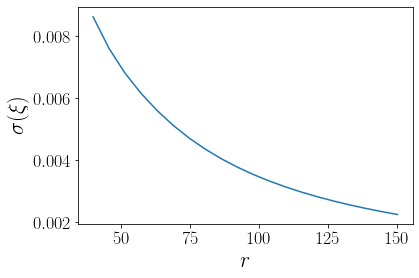

In [47]:
plt.plot(rs, xi_stds_cont)
plt.xlabel('$r$')
plt.ylabel(r'$\sigma(\xi)$')

### as function of n:

In [63]:
#ns = np.logspace(np.log10(1e-6), np.log10(1e-2), 10)
ns = np.array([1e-6, 1e-5, 1e-4, 2e-4])
r_val = 80

In [64]:
k_min = 2*np.pi/L
k_max = 20
print(k_min, k_max)

0.008377580409572781 20


In [74]:
xi_stds_n_cont = np.empty(ns.shape)

for i, n_val in enumerate(ns):
    
    def integrand_func(k):
        return k/r_val * (b**2 * Plin(k) + 1/(n_val))**2 * (scipy.special.jv(1/2, k*r_val))**2
    
    integral, _ = scipy.integrate.quad(integrand_func, k_min, k_max, limit=500)
    
    C = (2*np.pi)**(-1)/V * integral
    xi_stds_n_cont[i] = np.sqrt(C)

In [79]:
xi_stds_n = np.empty(ns.shape)
xi_stds_n_conv2 = np.empty(ns.shape)

for i, n_val in enumerate(ns):
    integrand_sampled = k[imin:imax]/r * (b2pk[imin:imax]+1/n_val)**2 * (scipy.special.jv(1/2, k[imin:imax]*r))**2
    integral = scipy.integrate.simpson(integrand_sampled, x=k[imin:imax])
    
    C = (2*np.pi)**(-1)/V * integral
    xi_stds_n[i] = np.sqrt(C)
    
    integrand_sampled_conv2 = k[imin:imax]/r * (b2pk[imin:imax]+1/(n_val*(2*np.pi)**3))**2 * (scipy.special.jv(1/2, k[imin:imax]*r))**2
    integral_conv2 = scipy.integrate.simpson(integrand_sampled_conv2, x=k[imin:imax])
    
    C_conv2 = (2*np.pi)**(5)/V * integral_conv2
    xi_stds_n_conv2[i] = np.sqrt(C_conv2)

In [82]:
for i in range(len(ns)):
    print(ns[i], xi_stds_n[i], xi_stds_n_conv2[i])

1e-06 0.32615838608113706 0.3854379826111615
1e-05 0.032683301599332706 0.18335623196691295
0.0001 0.0034027040428684114 0.17776305687462438
0.0002 0.001840282236396755 0.17758942094941066


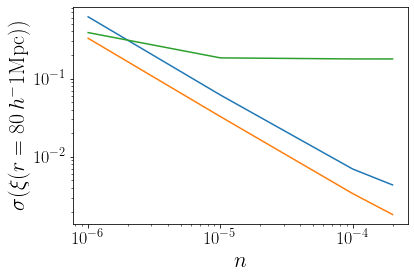

In [81]:
plt.plot(ns, xi_stds_n_cont)
plt.plot(ns, xi_stds_n)
plt.plot(ns, xi_stds_n_conv2)

plt.xlabel('$n$')
plt.ylabel(fr'$\sigma(\xi(r={r_val} \, h^{-1} \mathrm{{Mpc}}))$')

plt.xscale('log')
plt.yscale('log')

### correlation function from p(k)

In [56]:
k_min = 2*np.pi/L
k_max = 20
print(k_min, k_max)

imin = np.abs(k - k_min).argmin()
imax = np.abs(k - k_max).argmin()
print(k[imin], k[imax])

0.008377580409572781 20
0.0084556074 19.827593


In [89]:
rs = np.linspace(40, 150, 10)
xi_arr = np.empty(rs.shape)
for i, r in enumerate(rs):
    
    #integrand_xi_sampled = b**2 * pk[imin:imax] * np.sin(k[imin:imax]*r)/(k[imin:imax]*r) * 4*np.pi * k[imin:imax]**2
    #integral_xi = scipy.integrate.simpson(integrand_xi_sampled, x=k[imin:imax])
    
    # eqn 1.65, https://www.mv.helsinki.fi/home/hkurkisu/GSC1.pdf
    # goes with convention xi(r) = 1/(2pi)^3 * integral(d^3k e^{ikr} P(k))
    def integrand_xi_func(k):
        return b**2 * P_interp(k) * np.sin(k*r)/(k*r) * 4*np.pi * k**2

    integral_xi, _ = scipy.integrate.quad(integrand_xi_func, k_min, k_max, limit=500)
    xi = 1/(2*np.pi)**3 * integral_xi

    
    
    xi_arr[i] = xi

/state/partition1/job-29645869/ipykernel_3436920/2808216183.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_xi, _ = scipy.integrate.quad(integrand_xi_func, k_min, k_max, limit=500)


Text(0, 0.5, '$\\xi(r)$')

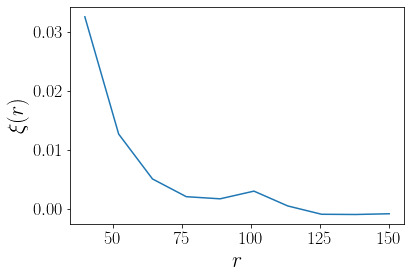

In [90]:
plt.plot(rs, xi_arr)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

#plt.xscale('log')
#plt.yscale('log')

